In [1]:
#Lending Club Case Study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lending_club = pd.read_csv("loan.csv")
lending_club.shape

C:\Users\Rashmi.Jennefer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(39717, 111)

In [2]:
#Step1 : Data Understanding
#We have 39717 rows and 111 Column
#Hence we will delete columns which have more than 50% null values
perc = 50.0
min_count =  int(((100-perc)/100)*lending_club.shape[0] + 1)
lending_club_rev1 = lending_club.dropna( axis=1, thresh=min_count)
lending_club_rev1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [3]:
lending_club_rev1.shape

(39717, 54)

In [5]:
# We have deleted columns which had more than 50% null values. So now we are left with 54 columns only
# Now Deleting rows which have more than 50% null values
perc1 = 50.0 # Like N %
min_count1 =  int(((100-perc1)/100)*lending_club_rev1.shape[1] + 1)
lending_club_rev2 = lending_club_rev1.dropna( axis=0, thresh=min_count1)
lending_club_rev2.shape

(39717, 54)

In [70]:
#Since there are rows which have more than 50% null values. So the number of rows are same and no rows deleted

In [6]:
#After analysing the column data we are removing irrelevent columns
lending_club_rev3=lending_club_rev2.drop(['member_id','emp_title','issue_d','pymnt_plan','url', 'desc','purpose','title','zip_code','addr_state','earliest_cr_line','inq_last_6mths','pub_rec', 'initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','funded_amnt','funded_amnt_inv','term','installment','verification_status','open_acc','revol_bal','revol_util','total_acc'],axis=1)
lending_club_rev3.shape

(39717, 12)

In [7]:
#As per study we are focussing on "fully paid" and "charged off" we are dropping rows having loan status "Current"
lending_club_rev4=lending_club_rev3.drop( lending_club_rev3[(lending_club_rev3.loan_status)=="Current"].index)
lending_club_rev4.shape

(38577, 12)

In [75]:
#Conclusion  : After study we have come up with relevent columns to be considered for analysis
#id, loan_amnt, int_rate, grade, sub_grade, emp_length, home_ownership, annual_inc, loan_status, dti, delinq_2yrs, pub_rec_bankruptcies 

In [8]:
#these are the final parameters we have come up with which we think are good for analysis
lending_club_rev4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   int_rate              38577 non-null  object 
 3   grade                 38577 non-null  object 
 4   sub_grade             38577 non-null  object 
 5   emp_length            37544 non-null  object 
 6   home_ownership        38577 non-null  object 
 7   annual_inc            38577 non-null  float64
 8   loan_status           38577 non-null  object 
 9   dti                   38577 non-null  float64
 10  delinq_2yrs           38577 non-null  int64  
 11  pub_rec_bankruptcies  37880 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 3.8+ MB


In [9]:
#Step 2 : Data Cleaning
lending_club_rev4.id.duplicated().sum()

0

In [10]:
#Removing '%' from int_rate
#Converting column int_rate from object to float
lending_club_rev4['int_rate']=lending_club_rev4.int_rate.apply(lambda x:x[:-1])
lending_club_rev4['int_rate']=lending_club_rev4['int_rate'].astype(str).astype(float)
print(lending_club_rev4.head(10))

         id  loan_amnt  int_rate grade sub_grade emp_length home_ownership  \
0   1077501       5000     10.65     B        B2  10+ years           RENT   
1   1077430       2500     15.27     C        C4   < 1 year           RENT   
2   1077175       2400     15.96     C        C5  10+ years           RENT   
3   1076863      10000     13.49     C        C1  10+ years           RENT   
5   1075269       5000      7.90     A        A4    3 years           RENT   
6   1069639       7000     15.96     C        C5    8 years           RENT   
7   1072053       3000     18.64     E        E1    9 years           RENT   
8   1071795       5600     21.28     F        F2    4 years            OWN   
9   1071570       5375     12.69     B        B5   < 1 year           RENT   
10  1070078       6500     14.65     C        C3    5 years            OWN   

    annual_inc  loan_status    dti  delinq_2yrs  pub_rec_bankruptcies  
0      24000.0   Fully Paid  27.65            0                   0.0

In [11]:
#Replace 'n/a' with '0' in the column emp_length
lending_club_rev4['emp_length']=lending_club_rev4['emp_length'].fillna(0)
lending_club_rev4

,id,loan_amnt,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,pub_rec_bankruptcies
0,1077501,5000,10.65,B,B2,10+ years,RENT,24000.0,Fully Paid,27.65,0,0.0
1,1077430,2500,15.27,C,C4,< 1 year,RENT,30000.0,Charged Off,1.00,0,0.0
2,1077175,2400,15.96,C,C5,10+ years,RENT,12252.0,Fully Paid,8.72,0,0.0
3,1076863,10000,13.49,C,C1,10+ years,RENT,49200.0,Fully Paid,20.00,0,0.0
5,1075269,5000,7.90,A,A4,3 years,RENT,36000.0,Fully Paid,11.20,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,8.07,A,A4,4 years,MORTGAGE,110000.0,Fully Paid,11.33,0,NaN
39713,90665,8500,10.28,C,C1,3 years,RENT,18000.0,Fully Paid,6.40,1,NaN
39714,90395,5000,8.07,A,A4,< 1 year,MORTGAGE,100000.0,Fully Paid,2.30,0,NaN
39715,90376,5000,7.43,A,A2,< 1 year,MORTGAGE,200000.0,Fully Paid,3.72,0,NaN


In [12]:
#Removing unnecessary data from column 'emp_length' eg 'years', '<year', etc
lending_club_rev4['emp_length']=lending_club_rev4['emp_length'].str.replace(r'\D','')
lending_club_rev4.head()

C:\Users\RASHMI~1.JEN\AppData\Local\Temp/ipykernel_20848/1725159541.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  lending_club_rev4['emp_length']=lending_club_rev4['emp_length'].str.replace(r'\D','')


,id,loan_amnt,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,pub_rec_bankruptcies
0,1077501,5000,10.65,B,B2,10,RENT,24000.0,Fully Paid,27.65,0,0.0
1,1077430,2500,15.27,C,C4,1,RENT,30000.0,Charged Off,1.00,0,0.0
2,1077175,2400,15.96,C,C5,10,RENT,12252.0,Fully Paid,8.72,0,0.0
3,1076863,10000,13.49,C,C1,10,RENT,49200.0,Fully Paid,20.00,0,0.0
5,1075269,5000,7.90,A,A4,3,RENT,36000.0,Fully Paid,11.20,0,0.0


In [13]:
#Converting column int_rate from object to float
lending_club_rev4['emp_length']=lending_club_rev4['emp_length'].astype(str).astype(float)
lending_club_rev4.head(10)

,id,loan_amnt,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,pub_rec_bankruptcies
0,1077501,5000,10.65,B,B2,10.0,RENT,24000.0,Fully Paid,27.65,0,0.0
1,1077430,2500,15.27,C,C4,1.0,RENT,30000.0,Charged Off,1.00,0,0.0
2,1077175,2400,15.96,C,C5,10.0,RENT,12252.0,Fully Paid,8.72,0,0.0
3,1076863,10000,13.49,C,C1,10.0,RENT,49200.0,Fully Paid,20.00,0,0.0
5,1075269,5000,7.90,A,A4,3.0,RENT,36000.0,Fully Paid,11.20,0,0.0
6,1069639,7000,15.96,C,C5,8.0,RENT,47004.0,Fully Paid,23.51,0,0.0
7,1072053,3000,18.64,E,E1,9.0,RENT,48000.0,Fully Paid,5.35,0,0.0
8,1071795,5600,21.28,F,F2,4.0,OWN,40000.0,Charged Off,5.55,0,0.0
9,1071570,5375,12.69,B,B5,1.0,RENT,15000.0,Charged Off,18.08,0,0.0
10,1070078,6500,14.65,C,C3,5.0,OWN,72000.0,Fully Paid,16.12,0,0.0


In [14]:
lending_club_rev4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   int_rate              38577 non-null  float64
 3   grade                 38577 non-null  object 
 4   sub_grade             38577 non-null  object 
 5   emp_length            37544 non-null  float64
 6   home_ownership        38577 non-null  object 
 7   annual_inc            38577 non-null  float64
 8   loan_status           38577 non-null  object 
 9   dti                   38577 non-null  float64
 10  delinq_2yrs           38577 non-null  int64  
 11  pub_rec_bankruptcies  37880 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 3.8+ MB


In [99]:
#Conclusion : We have cleaned the data and put it in a proper format and it is ready for next analysis

In [101]:
#Step 3: Data Analysis
#The following step will be performed using the following Exploratory data analysis
#a.Univariate analysis
#b.Bivariate analysis
#c.Segmented univariate analysis

In [15]:
#a. Univariate Analysis
lending_club_rev4.describe()

,id,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,pub_rec_bankruptcies
count,3.857700e+04,38577.000000,38577.000000,37544.000000,3.857700e+04,38577.000000,38577.000000,37880.000000
mean,6.763787e+05,11047.025430,11.932219,5.061048,6.877797e+04,13.272727,0.146668,0.043479
std,2.092639e+05,7348.441646,3.691327,3.401750,6.421868e+04,6.673044,0.492271,0.204583
min,5.473400e+04,500.000000,5.420000,1.000000,4.000000e+03,0.000000,0.000000,0.000000
25%,5.120330e+05,5300.000000,8.940000,2.000000,4.000000e+04,8.130000,0.000000,0.000000
50%,6.564230e+05,9600.000000,11.710000,4.000000,5.886800e+04,13.370000,0.000000,0.000000
75%,8.291460e+05,15000.000000,14.380000,9.000000,8.200000e+04,18.560000,0.000000,0.000000
max,1.077501e+06,35000.000000,24.400000,10.000000,6.000000e+06,29.990000,11.000000,2.000000


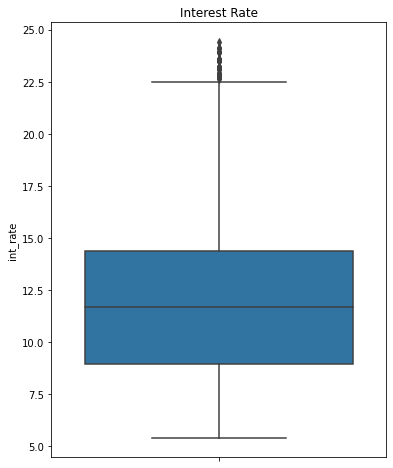

In [17]:
import seaborn as sns
plt.figure(figsize=[6,8])
sns.boxplot(y = 'int_rate', data = lending_club_rev4)
plt.title("Interest Rate")
plt.show()

In [121]:
#Conclusion : We can see the spread of interest rate and got data about max, min, mean values
#maximum interest rate - 22.5
#minimum interest rate - 6
#mean interest rate - around 11.5
#Outliers - Above 22.5

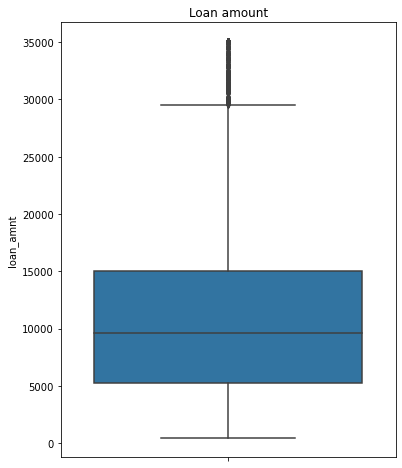

In [18]:
plt.figure(figsize=[6,8])
sns.boxplot(y = 'loan_amnt', data = lending_club_rev4)
plt.title("Loan amount")
plt.show()

In [125]:
#Conclusion : We can see the spread of loan amount and got data about max, min, mean values
#maximum interest rate - 29000
#minimum interest rate - 5500
#mean interest rate - around 9500
#Outliers - Above 15000

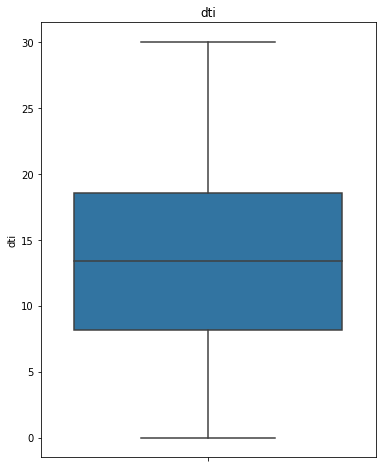

In [19]:
plt.figure(figsize=[6,8])
sns.boxplot(y = 'dti', data = lending_club_rev4)
plt.title("dti")
plt.show()

In [128]:
#Conclusion : We can see the spread of dti and got data about max, min, mean values
#maximum interest rate - 18
#minimum interest rate - 8
#mean interest rate - around 13
#Outliers - No outliers

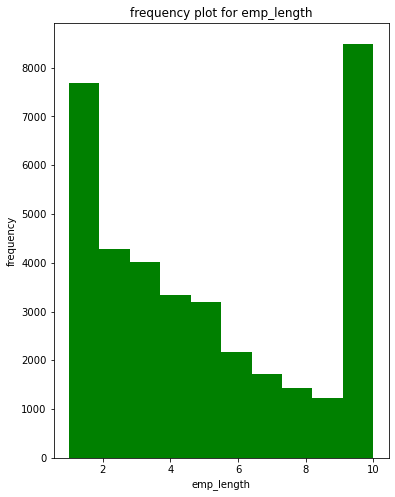

In [20]:
plt.figure(figsize=[6,8]) 
plt.hist(lending_club_rev4.emp_length,bins=10, color="green") 
plt.xlabel("emp_length") 
plt.ylabel("frequency") 
plt.title("frequency plot for emp_length") 
plt.show()

In [136]:
#Conclusion : Employee having 10+ years experience in the company constitute highest amount

Text(0.5, 1.0, 'delinq 2 yrs')

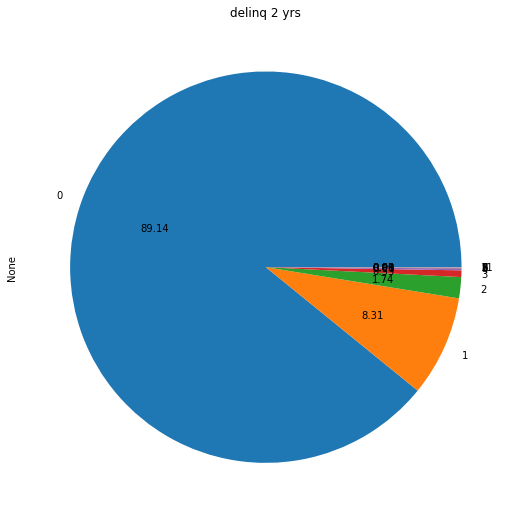

In [21]:
plt.figure(figsize=[9,9])
lending_club_rev4.groupby('delinq_2yrs').size().plot(kind='pie', autopct = '%.2f')
plt.title("delinq 2 yrs")

In [ ]:
#Conclusion : Maximum borrowers have no delinquecy

Text(0.5, 1.0, 'Grade')

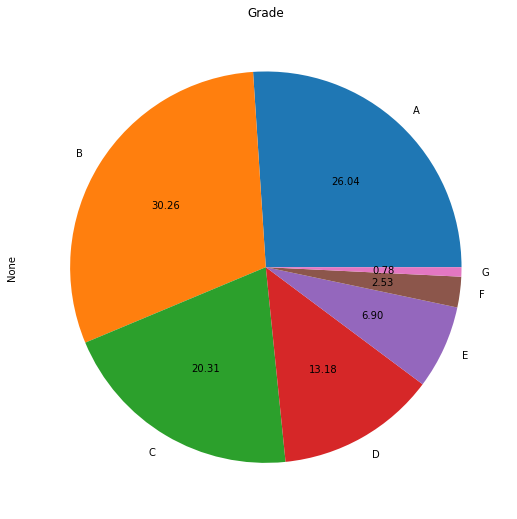

In [22]:
plt.figure(figsize=[9,9])
lending_club_rev4.groupby('grade').size().plot(kind='pie', autopct = '%.2f')
plt.title("Grade")

In [ ]:
#Conclusion : People with grades 'A', 'B', 'C' constitute the maximum qunatity

Text(0, 0.5, 'Count')

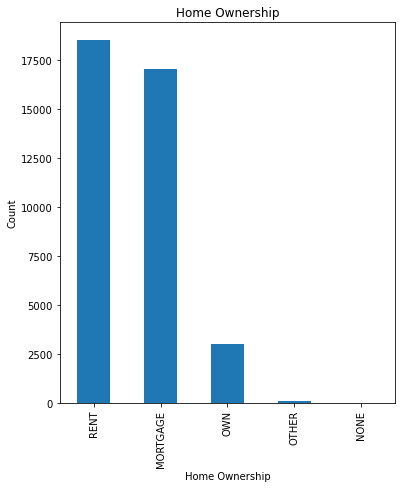

In [23]:
plt.figure(figsize=[6,7])
lending_club_rev4['home_ownership'].value_counts().plot.bar()
plt.title("Home Ownership")
plt.xlabel("Home Ownership")
plt.ylabel("Count")

In [144]:
#Conclusion : Most of the people are in Rent or mortage and very less people have their own house.
#We have individually analysed various columns and got many interesting insights. Lets move forward to bivariate analysis.

In [ ]:
#b. Bivariate Analysis

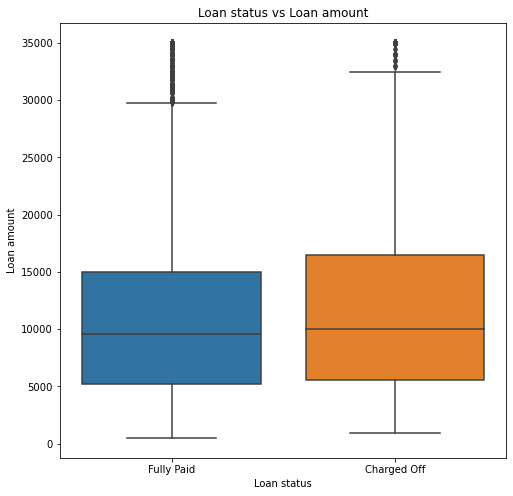

In [24]:
plt.figure(figsize=[8,8])
sns.boxplot(x='loan_status', y = 'loan_amnt', data = lending_club_rev4)
plt.title("Loan status vs Loan amount")
plt.xlabel("Loan status")
plt.ylabel("Loan amount")
plt.show()

In [ ]:
#Conclusion: Lower loan amount is recoverable than higher loan amount.

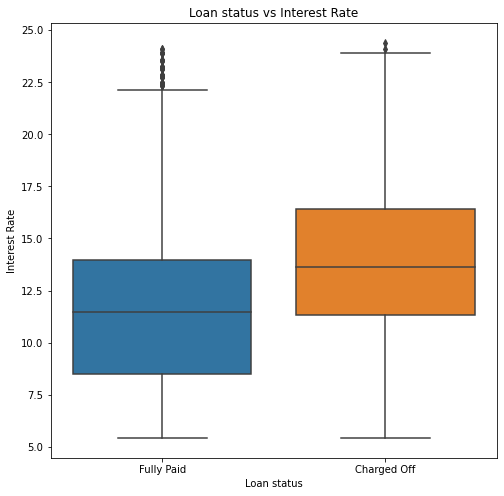

In [25]:
plt.figure(figsize=[8,8])
sns.boxplot(x='loan_status', y = 'int_rate', data = lending_club_rev4)
plt.title("Loan status vs Interest Rate")
plt.xlabel("Loan status")
plt.ylabel("Interest Rate")
plt.show()

In [27]:
#Conclusion: If interest rate is higher there is more probability of chargeoff. If interest rate is lower there are more chances of recovery.

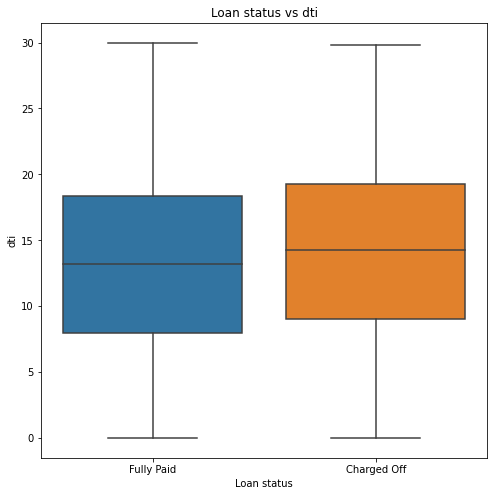

In [28]:
plt.figure(figsize=[8,8])
sns.boxplot(x='loan_status', y = 'dti', data = lending_club_rev4)
plt.title("Loan status vs dti")
plt.xlabel("Loan status")
plt.ylabel("dti")
plt.show()

In [ ]:
#Conclusion: Lower the dti, more is the chance of recovery of loan

Text(0, 0.5, 'Interest Rate')

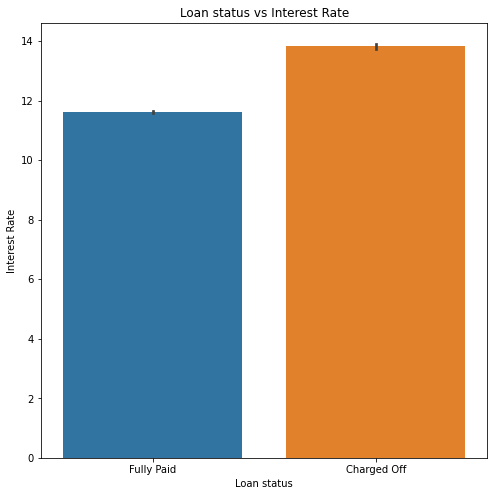

In [29]:
plt.figure(figsize=[8,8])
pt=sns.barplot(x= "loan_status", y = "int_rate" , data = lending_club_rev4 )
plt.title("Loan status vs Interest Rate")
plt.xlabel("Loan status")

plt.ylabel("Interest Rate")

In [ ]:
#Conclusion: If interest rate is higher there is more probability of chargeoff. If interest rate is lower there are more chances of recovery.

Text(0, 0.5, 'Annual Income')

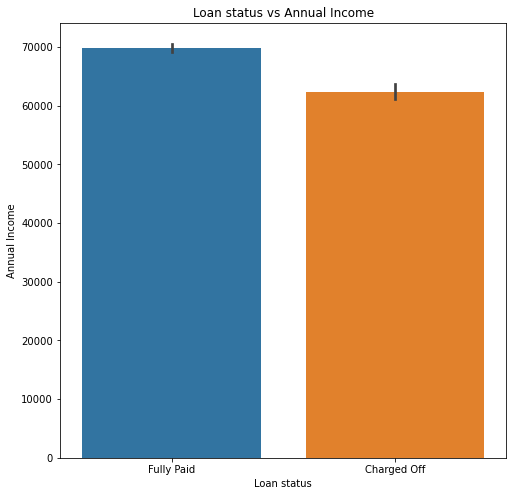

In [30]:
plt.figure(figsize=[8,8])
pt=sns.barplot(x= "loan_status", y = "annual_inc" , data = lending_club_rev4 )
plt.title("Loan status vs Annual Income")
plt.xlabel("Loan status")
plt.ylabel("Annual Income")

In [ ]:
#Conclusion: borrowers having more annual income tend to pay their loans completely

In [ ]:
#c. Segmented Univariate Analysis

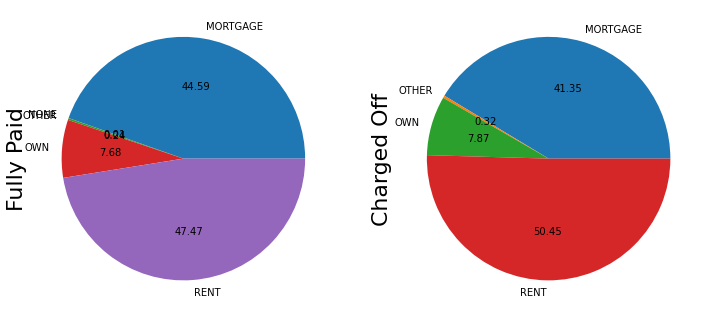

In [31]:
fullpaid = lending_club_rev4[(lending_club_rev4.loan_status)== "Fully Paid"] 
chrgoff = lending_club_rev4[(lending_club_rev4.loan_status)== "Charged Off"]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 10)) 
fullpaid.groupby('home_ownership').size().plot(kind='pie', autopct = '%.2f', ax=ax1) 
chrgoff.groupby('home_ownership').size().plot(kind='pie', autopct = '%.2f', ax=ax2) 
ax1.set_ylabel('Fully Paid', size=22) 
ax2.set_ylabel('Charged Off', size=22) 
plt.show()

In [ ]:
#Conclusion: Borrowers who are not having their own home and live on rent tends to charge off more 

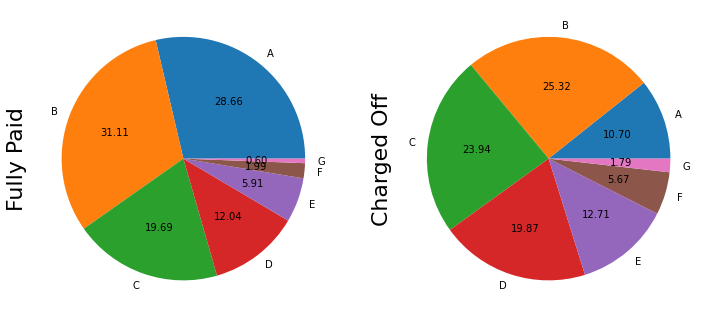

In [32]:
fullpaid = lending_club_rev4[(lending_club_rev4.loan_status)== "Fully Paid"] 
chrgoff = lending_club_rev4[(lending_club_rev4.loan_status)== "Charged Off"]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 10)) 
fullpaid.groupby('grade').size().plot(kind='pie', autopct = '%.2f', ax=ax1) 
chrgoff.groupby('grade').size().plot(kind='pie', autopct = '%.2f', ax=ax2) 
ax1.set_ylabel('Fully Paid', size=22) 
ax2.set_ylabel('Charged Off', size=22) 
plt.show()

In [ ]:
#Conclusion: Fully Paid borrowers with Grade 'A' are more than that of Charged off. Similary we can see the spread of grades across fully paid and charged off.

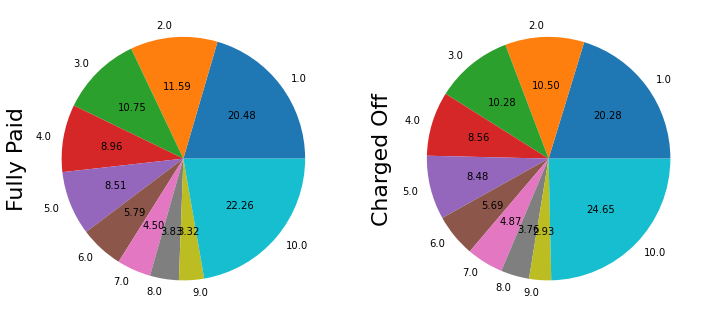

In [33]:
fullpaid = lending_club_rev4[(lending_club_rev4.loan_status)== "Fully Paid"] 
chrgoff = lending_club_rev4[(lending_club_rev4.loan_status)== "Charged Off"]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 10)) 
fullpaid.groupby('emp_length').size().plot(kind='pie', autopct = '%.2f', ax=ax1) 
chrgoff.groupby('emp_length').size().plot(kind='pie', autopct = '%.2f', ax=ax2) 
ax1.set_ylabel('Fully Paid', size=22) 
ax2.set_ylabel('Charged Off', size=22) 
plt.show()

In [ ]:
#Conclusion: Most of the borrowers are having <=1 years & >=10 years of experience in both fully paid and charged off category.

In [168]:
#c. Multivariate Analysis

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

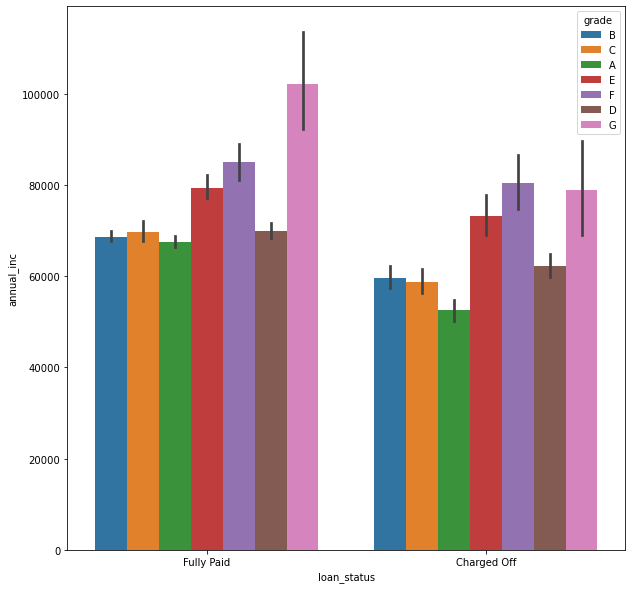

In [34]:
plt.figure(figsize=[10,10]) 
sns.barplot(x='loan_status', y='annual_inc', hue='grade', data=lending_club_rev4)

In [ ]:
#Conclusion: For each grade category fully paid have more aanual income as compared to charged off ones.

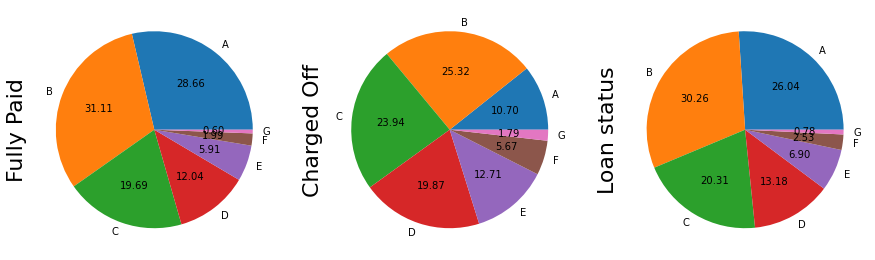

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 10))

fullpaid.groupby('grade').size().plot(kind='pie', autopct = '%.2f', ax=ax1)
chrgoff.groupby('grade').size().plot(kind='pie', autopct = '%.2f', ax=ax2)
lending_club_rev4.groupby('grade').size().plot(kind='pie', autopct = '%.2f', ax=ax3)
ax1.set_ylabel('Fully Paid', size=22)
ax2.set_ylabel('Charged Off', size=22)
ax3.set_ylabel('Loan status', size=22)
plt.show()

In [ ]:
#Conclusion: Grade 'A' people are more reliable

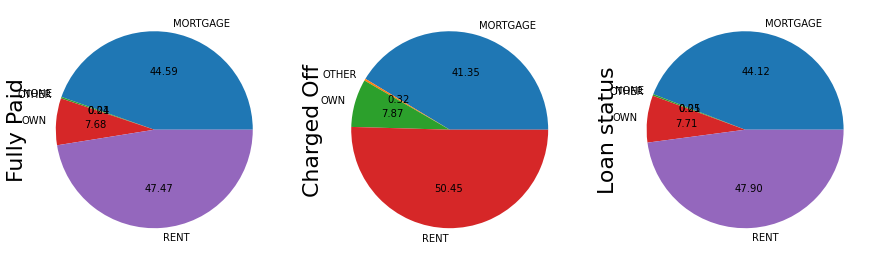

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 10))

fullpaid.groupby('home_ownership').size().plot(kind='pie', autopct = '%.2f', ax=ax1)
chrgoff.groupby('home_ownership').size().plot(kind='pie', autopct = '%.2f', ax=ax2)
lending_club_rev4.groupby('home_ownership').size().plot(kind='pie', autopct = '%.2f', ax=ax3)
ax1.set_ylabel('Fully Paid', size=22)
ax2.set_ylabel('Charged Off', size=22)
ax3.set_ylabel('Home Ownership status', size=22)
plt.show()

In [ ]:
#Conlusion: In general Most of the borrowers live on rent and less borrowers have their own house.

In [46]:
#lc5.pivot(index='loan_status', columns='grade', values='annual_inc')
#plot.show()
lending_club_rev4_grp_loanstatus = lending_club_rev4.groupby(["loan_status", "grade"]).mean()
lending_club_rev4_grp_loanstatus

id     loan_amnt   int_rate  emp_length  \
loan_status grade                                                       
Charged Off A      721034.149502   7799.916944   7.595997    5.195341   
            B      690900.189474  10905.771930  11.122295    5.101845   
            C      673741.183370  11044.469191  13.598656    5.138975   
            D      688266.425760  12204.651163  15.840474    5.207373   
            E      725182.184615  15849.825175  17.858336    5.265714   
            F      749782.006270  19272.570533  19.994545    5.696486   
            G      727484.950495  18542.821782  21.500000    5.210000   
Fully Paid  A      692483.818066   8670.959970   7.314083    5.179741   
            B      676951.326927  10938.817073  10.991862    5.020292   
            C      644856.037614  10767.978264  13.520049    4.834195   
            D      652896.173431  12118.918578  15.610781    4.963277   
            E      678790.718686  15617.825975  17.546689    5.184375   
            F      695616.974125  17523.592085  19.473044    5.147059   
            G      684305.010101  21125.378788  21.216566    5.651515   

                      annual_inc        dti  delinq_2yrs  pub_rec_bankruptcies  
loan_status grade                                                               
Charged Off A       52510.369385  13.346761     0.068106              0.015101  
            B       59637.703916  13.818253     0.108070              0.050860  
            C       58642.147253  14.429473     0.163326              0.076923  
            D       62356.418372  13.969812     0.214669              0.081106  
            E       73260.930741  14.176587     0.215385              0.086525  
            F       80346.769248  14.014671     0.341693              0.089457  
            G       78869.332970  13.802574     0.415842              0.118812  
Fully Paid  A       67584.992640  11.962274     0.043313              0.012786  
            B       68662.631802  13.324234     0.118439              0.045184  
            C       69618.868085  13.733028     0.195314              0.056800  
            D       69954.381026  13.910565     0.258382              0.050656  
            E       79453.814820  13.983316     0.246407              0.054082  
            F       85004.332177  14.301644     0.331811              0.055556  
            G      102130.903434  14.152980     0.429293              0.030612

In [45]:
lending_club_rev5=pd.pivot_table(lending_club_rev4, values='annual_inc', index=['loan_status'], columns=['grade'], aggfunc=np.mean)
lending_club_rev5

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,52510.369385,59637.703916,58642.147253,62356.418372,73260.930741,80346.769248,78869.332970
Fully Paid,67584.992640,68662.631802,69618.868085,69954.381026,79453.814820,85004.332177,102130.903434


In [ ]:
#Conclusion: Fully paid borrowers have more annual income in each grade than charged off. 